In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

사용한 파이썬 라이브러리 목록

: pandas, numpy, matplotlib

## 원본 데이터(gdp deflator)를 동일한 형식의 csv 파일로

- GDP deflator

- 2015년의 값을 기준(100)으로 (% 단위)

- 데이터 링크(world bank)
: https://data.worldbank.org/indicator/NY.GDP.DEFL.ZS

In [3]:
gdp_deflator = pd.read_csv("raw_data\gdp deflator.csv")
gdp_deflator = gdp_deflator[(gdp_deflator['Country Code'] == 'KOR') | (gdp_deflator['Country Code'] == 'JPN') | (gdp_deflator['Country Code'] == 'USA')]


In [4]:
gdp_deflator = gdp_deflator.transpose()

In [5]:
#gdp_deflator.to_csv("gdp_deflator.csv", header=False)

#  GDP_Deflator

In [6]:
gdp_deflator = pd.read_csv("raw_data\gdp_deflator.csv")

In [7]:
gdp_deflator

,Country Name,Japan,"Korea, Rep.",United States
0,Country Code,JPN,KOR,USA
1,Indicator Name,GDP deflator (base year varies by country),GDP deflator (base year varies by country),GDP deflator (base year varies by country)
2,Indicator Code,NY.GDP.DEFL.ZS,NY.GDP.DEFL.ZS,NY.GDP.DEFL.ZS
3,1960,22.5799595,0.859508567,15.71508388
4,1961,24.33797139,0.970488702,15.9272617
...,...,...,...,...
59,2016,100.4199444,101.9860385,101.0492474
60,2017,100.3452826,104.2529652,102.9490418
61,2018,100.3499276,104.7564538,105.4208289
62,2019,100.9930233,103.8772064,107.3027504


In [8]:
gdp_deflator.columns

Index(['Country Name', 'Japan', 'Korea, Rep.', 'United States'], dtype='object')

In [9]:
year = gdp_deflator['Country Name'].iloc[3:].astype(int)
year

3     1960
4     1961
5     1962
6     1963
7     1964
      ... 
59    2016
60    2017
61    2018
62    2019
63    2020
Name: Country Name, Length: 61, dtype: int32

In [10]:
korea_gdp_deflator = gdp_deflator['Korea, Rep.'].iloc[3:].astype(float)
korea_gdp_deflator

3       0.859509
4       0.970489
5       1.132788
6       1.472677
7       1.918929
         ...    
59    101.986039
60    104.252965
61    104.756454
62    103.877206
63    105.241020
Name: Korea, Rep., Length: 61, dtype: float64

In [11]:
japan_gdp_deflator = gdp_deflator['Japan'].iloc[3:].astype(float)
japan_gdp_deflator

3      22.579960
4      24.337971
5      25.360063
6      26.757522
7      28.183351
         ...    
59    100.419944
60    100.345283
61    100.349928
62    100.993023
63    101.843551
Name: Japan, Length: 61, dtype: float64

In [12]:
usa_gdp_deflator = gdp_deflator['United States'].iloc[3:].astype(float)
usa_gdp_deflator

3      15.715084
4      15.927262
5      16.125498
6      16.301006
7      16.546163
         ...    
59    101.049247
60    102.949042
61    105.420829
62    107.302750
63    108.595965
Name: United States, Length: 61, dtype: float64

In [13]:
gdp_deflator = pd.concat([year,korea_gdp_deflator, japan_gdp_deflator, usa_gdp_deflator], axis=1)
gdp_deflator.rename(columns={'Country Name' : 'Year'}, inplace=True)
gdp_deflator

,Year,"Korea, Rep.",Japan,United States
3,1960,0.859509,22.579960,15.715084
4,1961,0.970489,24.337971,15.927262
5,1962,1.132788,25.360063,16.125498
6,1963,1.472677,26.757522,16.301006
7,1964,1.918929,28.183351,16.546163
...,...,...,...,...
59,2016,101.986039,100.419944,101.049247
60,2017,104.252965,100.345283,102.949042
61,2018,104.756454,100.349928,105.420829
62,2019,103.877206,100.993023,107.302750


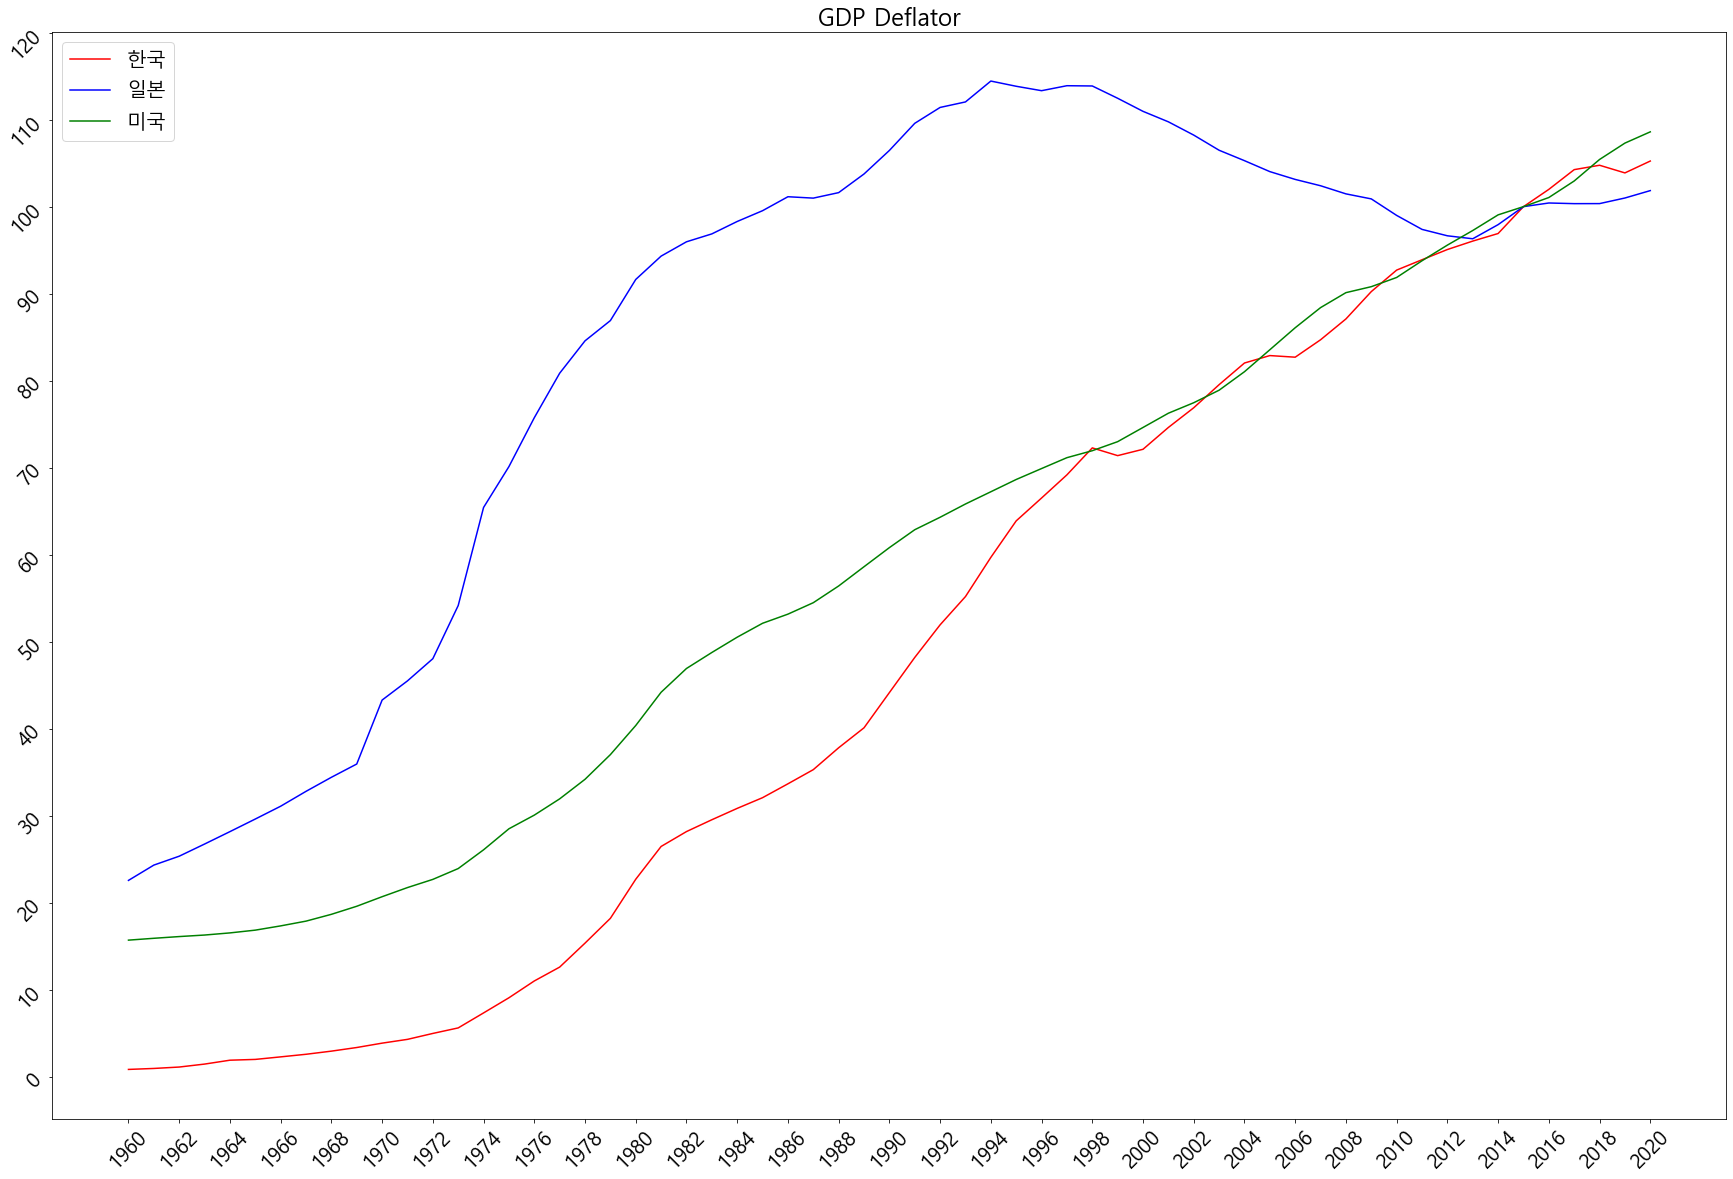

In [14]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=20) 
plt.figure(figsize=(30,20))
plt.plot(year, korea_gdp_deflator, label='한국', color='red')
plt.plot(year, japan_gdp_deflator, label='일본', color='blue')
plt.plot(year,usa_gdp_deflator, label='미국', color='green')
plt.title('GDP Deflator')
plt.legend()
plt.xticks(np.arange(1960,2022,2),rotation=45)
plt.yticks(np.arange(0,130,10),rotation=45)
plt.show()

## 원본 데이터(nominal gdp)를 동일한 형식의 csv 파일로

- 명목 gdp
- current US$ (현재 미달러화 기준)
- 데이터 링크(world bank) : https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

In [15]:
gdp =  pd.read_csv("raw_data\gdp.csv")
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,...,9.433780e+11,9.505210e+11,9.642420e+11,9.848070e+11,9.199300e+11,8.733550e+11,9.853560e+11,1.012850e+12,1.009910e+12,9.207920e+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,...,6.709630e+11,7.275710e+11,8.207880e+11,8.649670e+11,7.607300e+11,6.905430e+11,6.837420e+11,7.416920e+11,7.945720e+11,7.845880e+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.941719e+10,5.837598e+10


In [16]:
gdp = gdp[(gdp['Country Code'] == 'KOR') | (gdp['Country Code'] == 'JPN') | (gdp['Country Code'] == 'USA')]
gdp

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
119,Japan,JPN,GDP (current US$),NY.GDP.MKTP.CD,4.430734e+10,5.350862e+10,6.072302e+10,6.949813e+10,8.174901e+10,9.095028e+10,...,6.233150e+12,6.272360e+12,5.212330e+12,4.896990e+12,4.444930e+12,5.003680e+12,4.930840e+12,5.036890e+12,5.148780e+12,5.057760e+12
126,"Korea, Rep.",KOR,GDP (current US$),NY.GDP.MKTP.CD,3.958191e+09,2.417558e+09,2.814319e+09,3.988785e+09,3.458939e+09,3.120833e+09,...,1.253220e+12,1.278430e+12,1.370800e+12,1.484320e+12,1.465770e+12,1.500110e+12,1.623900e+12,1.724850e+12,1.651420e+12,1.637900e+12
251,United States,USA,GDP (current US$),NY.GDP.MKTP.CD,5.433000e+11,5.633000e+11,6.051000e+11,6.386000e+11,6.858000e+11,7.437000e+11,...,1.554260e+13,1.619700e+13,1.678480e+13,1.752720e+13,1.823830e+13,1.874510e+13,1.954300e+13,2.061190e+13,2.143320e+13,2.095300e+13


In [17]:
gdp = gdp.transpose()
gdp

,119,126,251
Country Name,Japan,"Korea, Rep.",United States
Country Code,JPN,KOR,USA
Indicator Name,GDP (current US$),GDP (current US$),GDP (current US$)
Indicator Code,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD
1960,44307342950.0,3958190759.0,543300000000.0
...,...,...,...
2016,5003680000000.0,1500110000000.0,18745100000000.0
2017,4930840000000.0,1623900000000.0,19543000000000.0
2018,5036890000000.0,1724850000000.0,20611900000000.0
2019,5148780000000.0,1651420000000.0,21433200000000.0


In [85]:
#gdp.to_csv("nominal_gdp.csv", header=False)

# Nominal GDP 

In [19]:
nominal_gdp =  pd.read_csv("raw_data/nominal_gdp.csv")
nominal_gdp.head()

,Country Name,Japan,"Korea, Rep.",United States
0,Country Code,JPN,KOR,USA
1,Indicator Name,GDP (current US$),GDP (current US$),GDP (current US$)
2,Indicator Code,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD,NY.GDP.MKTP.CD
3,1960,44307342950.0,3958190759.0,543300000000.0
4,1961,53508617739.0,2417558289.0,563300000000.0


In [20]:
year = nominal_gdp['Country Name'].iloc[3:].astype(int)
year

3     1960
4     1961
5     1962
6     1963
7     1964
      ... 
59    2016
60    2017
61    2018
62    2019
63    2020
Name: Country Name, Length: 61, dtype: int32

In [21]:
korea_nominal_gdp = nominal_gdp['Korea, Rep.'].iloc[3:].astype(float)
korea_nominal_gdp

3     3.958191e+09
4     2.417558e+09
5     2.814319e+09
6     3.988785e+09
7     3.458939e+09
          ...     
59    1.500110e+12
60    1.623900e+12
61    1.724850e+12
62    1.651420e+12
63    1.637900e+12
Name: Korea, Rep., Length: 61, dtype: float64

In [22]:
japan_nominal_gdp = nominal_gdp['Japan'].iloc[3:].astype(float)
japan_nominal_gdp

3     4.430734e+10
4     5.350862e+10
5     6.072302e+10
6     6.949813e+10
7     8.174901e+10
          ...     
59    5.003680e+12
60    4.930840e+12
61    5.036890e+12
62    5.148780e+12
63    5.057760e+12
Name: Japan, Length: 61, dtype: float64

In [23]:
usa_nominal_gdp = nominal_gdp['United States'].iloc[3:].astype(float)
usa_nominal_gdp

3     5.433000e+11
4     5.633000e+11
5     6.051000e+11
6     6.386000e+11
7     6.858000e+11
          ...     
59    1.874510e+13
60    1.954300e+13
61    2.061190e+13
62    2.143320e+13
63    2.095300e+13
Name: United States, Length: 61, dtype: float64

In [24]:
nominal_gdp = pd.concat([year,korea_nominal_gdp, japan_nominal_gdp, usa_nominal_gdp], axis=1)
nominal_gdp.rename(columns={'Country Name' : 'Year'}, inplace=True)
nominal_gdp

,Year,"Korea, Rep.",Japan,United States
3,1960,3.958191e+09,4.430734e+10,5.433000e+11
4,1961,2.417558e+09,5.350862e+10,5.633000e+11
5,1962,2.814319e+09,6.072302e+10,6.051000e+11
6,1963,3.988785e+09,6.949813e+10,6.386000e+11
7,1964,3.458939e+09,8.174901e+10,6.858000e+11
...,...,...,...,...
59,2016,1.500110e+12,5.003680e+12,1.874510e+13
60,2017,1.623900e+12,4.930840e+12,1.954300e+13
61,2018,1.724850e+12,5.036890e+12,2.061190e+13
62,2019,1.651420e+12,5.148780e+12,2.143320e+13


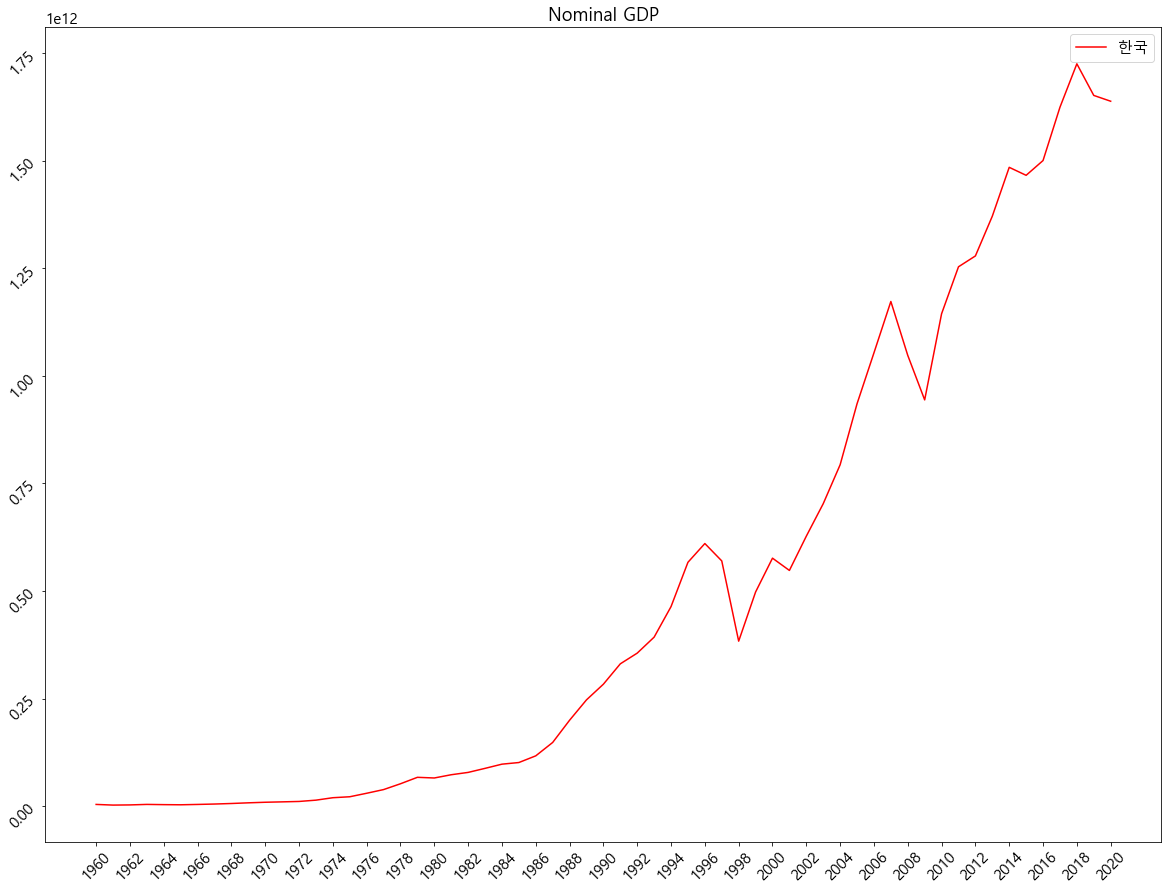

In [92]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))
plt.plot(year, korea_nominal_gdp, label='한국', color='red')
plt.plot(year, japan_nominal_gdp, label='일본', color='blue')
plt.plot(year,usa_nominal_gdp, label='미국', color='green')
plt.title('Nominal GDP')
plt.legend()
plt.xticks(np.arange(1960,2022,2),rotation=45)
plt.yticks(rotation=45)
plt.show()

# gdp deflator & nominal gdp >>> Real GDP

GDP deflator = (명목 GDP / 실질 GDP) X 100


위의 gdp deflator 식에 따라 실질 gdp 값을 계산하여 사용

In [26]:
korea_real_gdp = nominal_gdp['Korea, Rep.'].div(gdp_deflator['Korea, Rep.']/100)
korea_real_gdp

3     4.605179e+11
4     2.491073e+11
5     2.484417e+11
6     2.708526e+11
7     1.802536e+11
          ...     
59    1.470897e+12
60    1.557654e+12
61    1.646533e+12
62    1.589781e+12
63    1.556332e+12
Name: Korea, Rep., Length: 61, dtype: float64

In [27]:
japan_real_gdp = nominal_gdp['Japan'].div(gdp_deflator['Japan']/100)
japan_real_gdp

3     1.962242e+11
4     2.198565e+11
5     2.394435e+11
6     2.597331e+11
7     2.900613e+11
          ...     
59    4.982755e+12
60    4.913873e+12
61    5.019326e+12
62    5.098154e+12
63    4.966205e+12
Name: Japan, Length: 61, dtype: float64

In [28]:
usa_real_gdp = nominal_gdp['United States'].div(gdp_deflator['United States']/100)
usa_real_gdp

3     3.457188e+12
4     3.536703e+12
5     3.752442e+12
6     3.917550e+12
7     4.144768e+12
          ...     
59    1.855046e+13
60    1.898318e+13
61    1.955202e+13
62    1.997451e+13
63    1.929446e+13
Name: United States, Length: 61, dtype: float64

In [29]:
real_gdp = pd.concat([year, korea_real_gdp, japan_real_gdp, usa_real_gdp], axis=1)
real_gdp.rename(columns={'Country Name' : 'Year'}, inplace=True)
real_gdp

,Year,"Korea, Rep.",Japan,United States
3,1960,4.605179e+11,1.962242e+11,3.457188e+12
4,1961,2.491073e+11,2.198565e+11,3.536703e+12
5,1962,2.484417e+11,2.394435e+11,3.752442e+12
6,1963,2.708526e+11,2.597331e+11,3.917550e+12
7,1964,1.802536e+11,2.900613e+11,4.144768e+12
...,...,...,...,...
59,2016,1.470897e+12,4.982755e+12,1.855046e+13
60,2017,1.557654e+12,4.913873e+12,1.898318e+13
61,2018,1.646533e+12,5.019326e+12,1.955202e+13
62,2019,1.589781e+12,5.098154e+12,1.997451e+13


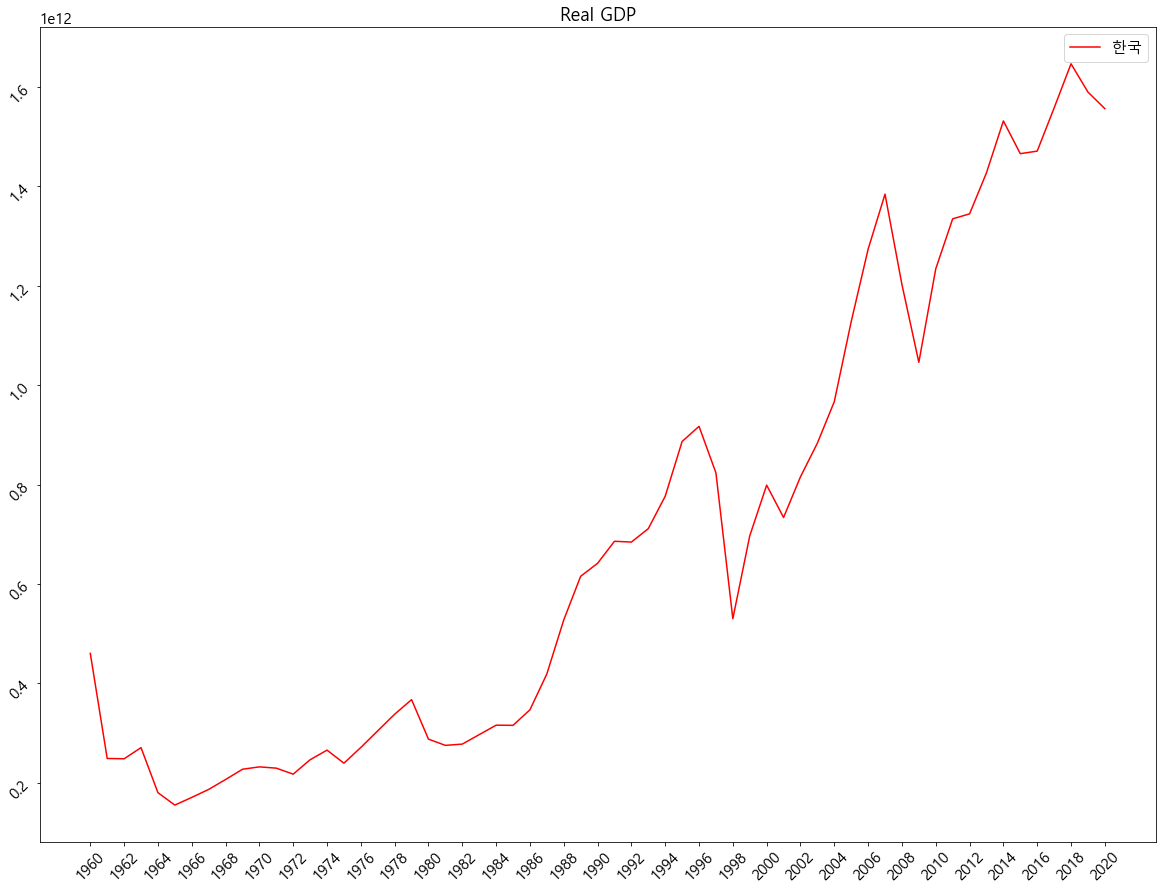

In [93]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))
plt.plot(year, korea_real_gdp, label='한국', color='red')
#plt.plot(year, japan_real_gdp, label='일본', color='blue')
#plt.plot(year,usa_real_gdp, label='미국', color='green')
plt.title('Real GDP')
plt.legend()
plt.xticks(np.arange(1960,2022,2),rotation=45)
plt.yticks(rotation=45)
plt.show()

In [91]:
#real_gdp.to_csv("real_gdp.csv", index=False)

# Real GDP ln 로그 변환

회귀분석 식에 실제 사용되는 데이터는 ln로그를 취한 수치이기 때문에 실질 GDP값에 ln로그를 취함

In [32]:
real_gdp_log = pd.concat([year, np.log(korea_real_gdp), np.log(japan_real_gdp), np.log(usa_real_gdp)], axis=1)
real_gdp_log.rename(columns={'Country Name' : 'Year'}, inplace=True)
real_gdp_log


,Year,"Korea, Rep.",Japan,United States
3,1960,26.855618,26.002524,28.871477
4,1961,26.241150,26.116241,28.894216
5,1962,26.238474,26.201583,28.953428
6,1963,26.324841,26.282920,28.996488
7,1964,25.917631,26.393358,29.052868
...,...,...,...,...
59,2016,28.016894,29.237004,30.551516
60,2017,28.074202,29.223084,30.574574
61,2018,28.129693,29.244317,30.604100
62,2019,28.094617,29.259900,30.625478


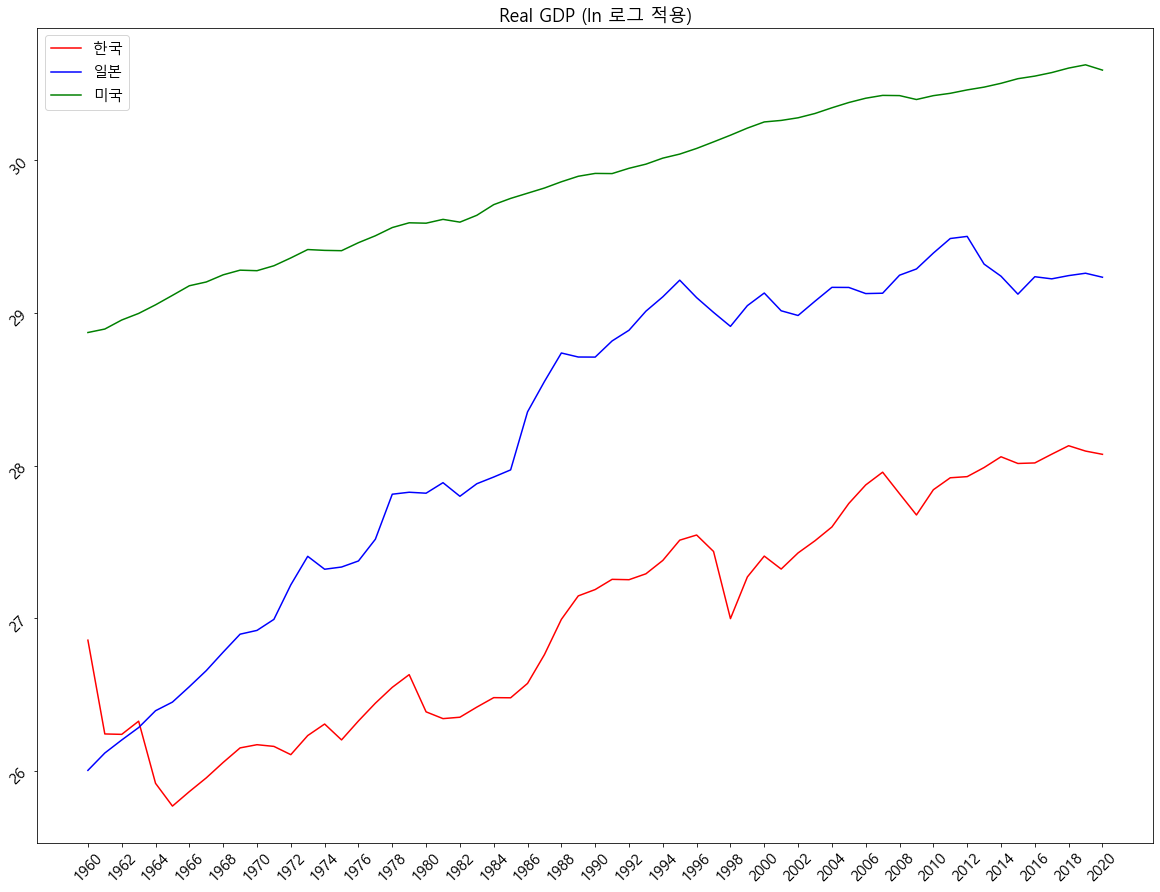

In [33]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))
plt.plot(real_gdp_log['Year'], real_gdp_log['Korea, Rep.'], label='한국', color='red')
plt.plot(real_gdp_log['Year'], real_gdp_log['Japan'], label='일본', color='blue')
plt.plot(real_gdp_log['Year'], real_gdp_log['United States'], label='미국', color='green')
plt.title('Real GDP (ln 로그 적용)')
plt.legend()
plt.xticks(np.arange(1960,2022,2),rotation=45)
plt.yticks(rotation=45)
plt.show()

In [34]:
real_gdp_log

,Year,"Korea, Rep.",Japan,United States
3,1960,26.855618,26.002524,28.871477
4,1961,26.241150,26.116241,28.894216
5,1962,26.238474,26.201583,28.953428
6,1963,26.324841,26.282920,28.996488
7,1964,25.917631,26.393358,29.052868
...,...,...,...,...
59,2016,28.016894,29.237004,30.551516
60,2017,28.074202,29.223084,30.574574
61,2018,28.129693,29.244317,30.604100
62,2019,28.094617,29.259900,30.625478


In [35]:
real_gdp_log.to_csv("real_gdp_log.csv", index=False)

## 원본 데이터(employment)를 동일한 형식의 dataframe 파일로

- Employment(고용수)

- 단위 : 1,000명

- 데이터 링크(OECD data) : https://data.oecd.org/emp/employment-rate.htm#indicator-chart
        
- 데이터 설명 

: Employment rates are defined as a measure of the extent to which available labour resources (people available to work) are being used. They are calculated as the ratio of the employed to the working age population. Employment rates are sensitive to the economic cycle, but in the longer term they are significantly affected by governments' higher education and income support policies and by policies that facilitate employment of women and disadvantaged groups. Employed people are those aged 15 or over who report that they have worked in gainful employment for at least one hour in the previous week or who had a job but were absent from work during the reference week. The working age population refers to people aged 15 to 64. This indicator is seasonally adjusted and it is measured in terms of thousand persons aged 15 and over; and in numbers of employed persons aged 15 to 64 as a percentage of working age population.


In [59]:
employment =  pd.read_csv("raw_data/employment.csv")
employment.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,JPN,EMP,TOT,THND_PER,A,1955,40895.83,NaN
1,JPN,EMP,TOT,THND_PER,A,1956,41705.00,NaN
2,JPN,EMP,TOT,THND_PER,A,1957,42796.67,NaN
3,JPN,EMP,TOT,THND_PER,A,1958,42973.33,NaN
4,JPN,EMP,TOT,THND_PER,A,1959,43356.67,NaN


In [60]:
japan_employment = employment.loc[employment['LOCATION'] == 'JPN']
japan_employment = japan_employment[['TIME', 'Value']]
japan_employment['Value'].describe()
japan_employment

,TIME,Value
0,1955,40895.83
1,1956,41705.00
2,1957,42796.67
3,1958,42973.33
4,1959,43356.67
...,...,...
61,2016,64701.67
62,2017,65424.17
63,2018,66820.00
64,2019,67495.84


In [61]:
japan_employment

,TIME,Value
0,1955,40895.83
1,1956,41705.00
2,1957,42796.67
3,1958,42973.33
4,1959,43356.67
...,...,...
61,2016,64701.67
62,2017,65424.17
63,2018,66820.00
64,2019,67495.84


In [62]:
japan_employment.index = list(japan_employment['TIME'].astype(int))
japan_employment

,TIME,Value
1955,1955,40895.83
1956,1956,41705.00
1957,1957,42796.67
1958,1958,42973.33
1959,1959,43356.67
...,...,...
2016,2016,64701.67
2017,2017,65424.17
2018,2018,66820.00
2019,2019,67495.84


In [63]:
korea_employment = employment.loc[employment['LOCATION'] == 'KOR']
korea_employment = korea_employment[['TIME', 'Value']]
korea_employment['Value'].describe()
korea_employment

,TIME,Value
66,1983,14504.67
67,1984,14428.83
68,1985,14970.17
69,1986,15504.83
70,1987,16354.00
71,1988,16869.33
72,1989,17560.58
73,1990,18084.75
74,1991,18648.75
75,1992,19009.33


In [64]:
korea_employment.index = list(korea_employment['TIME'].astype(int))
korea_employment

,TIME,Value
1983,1983,14504.67
1984,1984,14428.83
1985,1985,14970.17
1986,1986,15504.83
1987,1987,16354.00
1988,1988,16869.33
1989,1989,17560.58
1990,1990,18084.75
1991,1991,18648.75
1992,1992,19009.33


In [65]:
usa_employment = employment.loc[employment['LOCATION'] == 'USA']
usa_employment = usa_employment[['TIME', 'Value']]
usa_employment['Value'].describe()
usa_employment

,TIME,Value
104,1955,62170.33
105,1956,63800.58
106,1957,64067.92
107,1958,63036.33
108,1959,64629.83
...,...,...
165,2016,151435.80
166,2017,153337.40
167,2018,155761.00
168,2019,157538.10


In [66]:
usa_employment.index = list(usa_employment['TIME'].astype(int))
usa_employment

,TIME,Value
1955,1955,62170.33
1956,1956,63800.58
1957,1957,64067.92
1958,1958,63036.33
1959,1959,64629.83
...,...,...
2016,2016,151435.80
2017,2017,153337.40
2018,2018,155761.00
2019,2019,157538.10


In [67]:
employment = pd.concat([usa_employment['TIME'], korea_employment['Value'], japan_employment['Value'], usa_employment['Value']], axis=1)
employment.columns = ['Year', 'Korea', 'Japan', 'USA']

In [45]:
employment.to_csv("employment.csv", index=False)

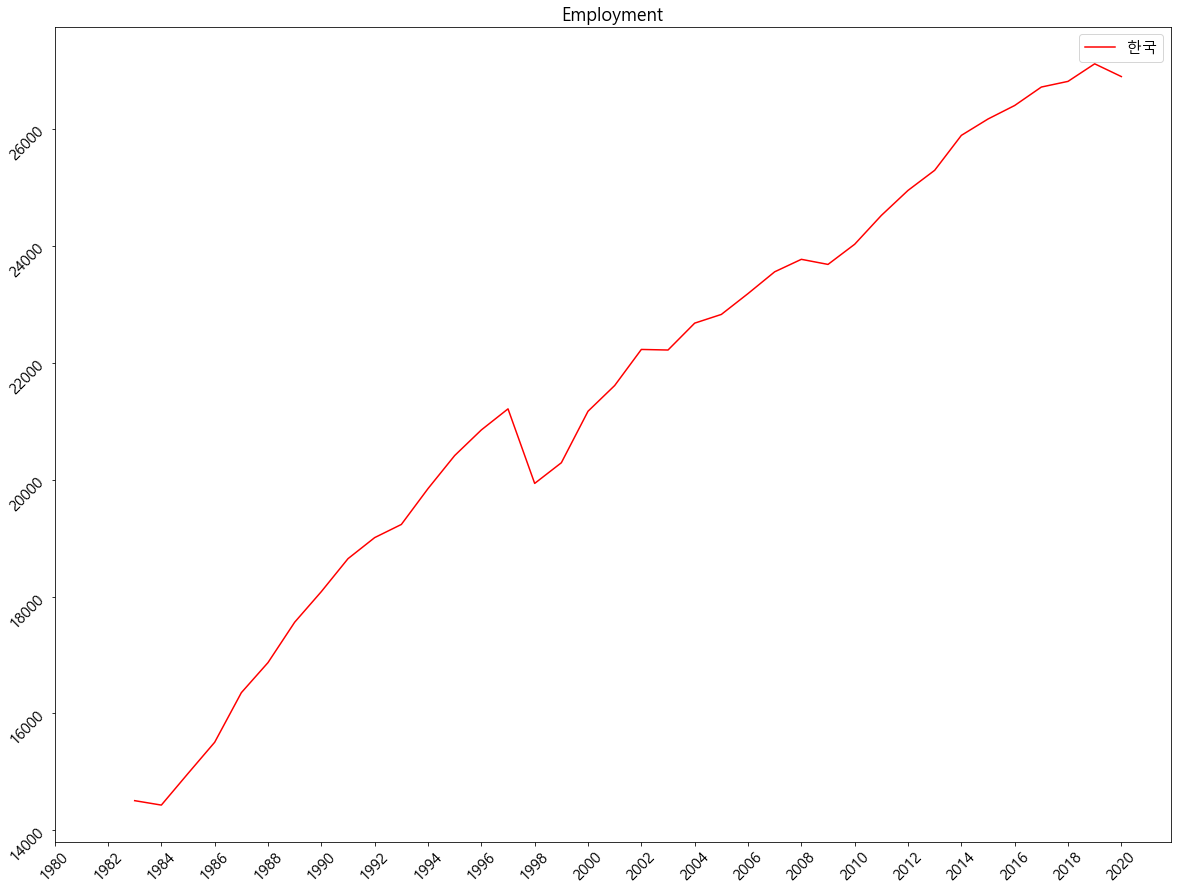

In [68]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))

plt.plot(employment['Year'], employment['Korea'], label='한국', color='red')
#plt.plot(employment['Year'], employment['Japan'], label='일본', color='blue')
#plt.plot(employment['Year'] ,employment['USA'], label='미국', color='green')
plt.title('Employment')
plt.legend()
plt.xticks(np.arange(1980,2022,2),rotation=45)
plt.yticks(rotation=45)
plt.show()

## 원본 데이터(hours worked)를 동일한 형식의 dataframe으로

- Hours Worked(노동 시간)

- 단위 : 시간

- 데이터 링크(OECD data) : https://data.oecd.org/emp/hours-worked.htm

- 데이터 설명 

: Average annual hours worked is defined as the total number of hours actually worked per year divided by the average number of people in employment per year. Actual hours worked include regular work hours of full-time, part-time and part-year workers, paid and unpaid overtime, hours worked in additional jobs, and exclude time not worked because of public holidays, annual paid leave, own illness, injury and temporary disability, maternity leave, parental leave, schooling or training, slack work for technical or economic reasons, strike or labour dispute, bad weather, compensation leave and other reasons. The data cover employees and self-employed workers. This indicator is measured in terms of hours per worker per year. The data are published with the following health warning: The data are intended for comparisons of trends over time; they are unsuitable for comparisons of the level of average annual hours of work for a given year, because of differences in their sources and method of calculation.

In [74]:
korea_hours_worked =  pd.read_csv("raw_data/한국근로시간.csv", encoding='cp949', index_col='Unnamed: 0')
korea_hours_worked = korea_hours_worked.T['전체']

korea_hours_worked = pd.DataFrame(korea_hours_worked)
for i in korea_hours_worked.index:
    korea_hours_worked.at[i, '전체'] = korea_hours_worked.at[i, '전체']*52
korea_hours_worked.index = range(1980, 2022, 1)
korea_hours_worked['TIME'] = range(1980, 2022, 1)
korea_hours_worked.columns = ['Value', 'TIME']

In [19]:
hours_worked =  pd.read_csv("raw_data/hours worked.csv")
hours_worked

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,JPN,HRWKD,TOT,HR_WKD,A,1970,2243,NaN
1,JPN,HRWKD,TOT,HR_WKD,A,1971,2239,NaN
2,JPN,HRWKD,TOT,HR_WKD,A,1972,2228,NaN
3,JPN,HRWKD,TOT,HR_WKD,A,1973,2201,NaN
4,JPN,HRWKD,TOT,HR_WKD,A,1974,2137,NaN
...,...,...,...,...,...,...,...,...
130,USA,HRWKD,TOT,HR_WKD,A,2016,1778,NaN
131,USA,HRWKD,TOT,HR_WKD,A,2017,1778,NaN
132,USA,HRWKD,TOT,HR_WKD,A,2018,1782,NaN
133,USA,HRWKD,TOT,HR_WKD,A,2019,1777,NaN


In [20]:
japan_hours_worked = hours_worked.loc[hours_worked['LOCATION'] == 'JPN']
japan_hours_worked = japan_hours_worked[['TIME', 'Value']]
japan_hours_worked['Value'].describe()
japan_hours_worked

,TIME,Value
0,1970,2243
1,1971,2239
2,1972,2228
3,1973,2201
4,1974,2137
5,1975,2112
6,1976,2128
7,1977,2129
8,1978,2123
9,1979,2126


In [21]:
japan_hours_worked.index = list(japan_hours_worked['TIME'].astype(int))
japan_hours_worked


,TIME,Value
1970,1970,2243
1971,1971,2239
1972,1972,2228
1973,1973,2201
1974,1974,2137
1975,1975,2112
1976,1976,2128
1977,1977,2129
1978,1978,2123
1979,1979,2126


In [22]:
korea_hours_worked = hours_worked.loc[hours_worked['LOCATION'] == 'KOR']
korea_hours_worked = korea_hours_worked[['TIME', 'Value']]
korea_hours_worked['Value'].describe()
korea_hours_worked

,TIME,Value
51,2008,2228
52,2009,2174
53,2010,2163
54,2011,2136
55,2012,2119
56,2013,2106
57,2014,2076
58,2015,2083
59,2016,2068
60,2017,2018


In [23]:
korea_hours_worked.index = list(korea_hours_worked['TIME'].astype(int))
korea_hours_worked


,TIME,Value
2008,2008,2228
2009,2009,2174
2010,2010,2163
2011,2011,2136
2012,2012,2119
2013,2013,2106
2014,2014,2076
2015,2015,2083
2016,2016,2068
2017,2017,2018


In [24]:
usa_hours_worked = hours_worked.loc[hours_worked['LOCATION'] == 'USA']
usa_hours_worked = usa_hours_worked[['TIME', 'Value']]
usa_hours_worked['Value'].describe()
usa_hours_worked

,TIME,Value
64,1950,1968
65,1951,1987
66,1952,1988
67,1953,1993
68,1954,1984
...,...,...
130,2016,1778
131,2017,1778
132,2018,1782
133,2019,1777


In [42]:
usa_hours_worked.index = list(usa_hours_worked['TIME'].astype(int))
usa_hours_worked.index


Int64Index([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
            1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
            1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
            1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
            1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
            2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
            2016, 2017, 2018, 2019, 2020],
           dtype='int64')

In [55]:
hours_worked = pd.concat([usa_hours_worked['TIME'], korea_hours_worked['전체'], japan_hours_worked['Value'], usa_hours_worked['Value']], axis=1)
hours_worked.columns = ['Year', 'Korea', 'Japan', 'USA']
hours_worked

,Year,Korea,Japan,USA
1950,1950.0,NaN,NaN,1968.0
1951,1951.0,NaN,NaN,1987.0
1952,1952.0,NaN,NaN,1988.0
1953,1953.0,NaN,NaN,1993.0
1954,1954.0,NaN,NaN,1984.0
...,...,...,...,...
2017,2017.0,2225.6,1709.0,1778.0
2018,2018.0,2158.0,1680.0,1782.0
2019,2019.0,2116.4,1644.0,1777.0
2020,2020.0,2028.0,1598.0,1767.0


In [35]:
hours_worked

,Year,Korea,Japan,USA
1950,1950.0,NaN,NaN,1968.0
1951,1951.0,NaN,NaN,1987.0
1952,1952.0,NaN,NaN,1988.0
1953,1953.0,NaN,NaN,1993.0
1954,1954.0,NaN,NaN,1984.0
...,...,...,...,...
2017,NaN,42.8,NaN,NaN
2018,NaN,41.5,NaN,NaN
2019,NaN,40.7,NaN,NaN
2020,NaN,39.0,NaN,NaN


In [57]:
hours_worked.to_csv("hours_worked.csv", index=False)

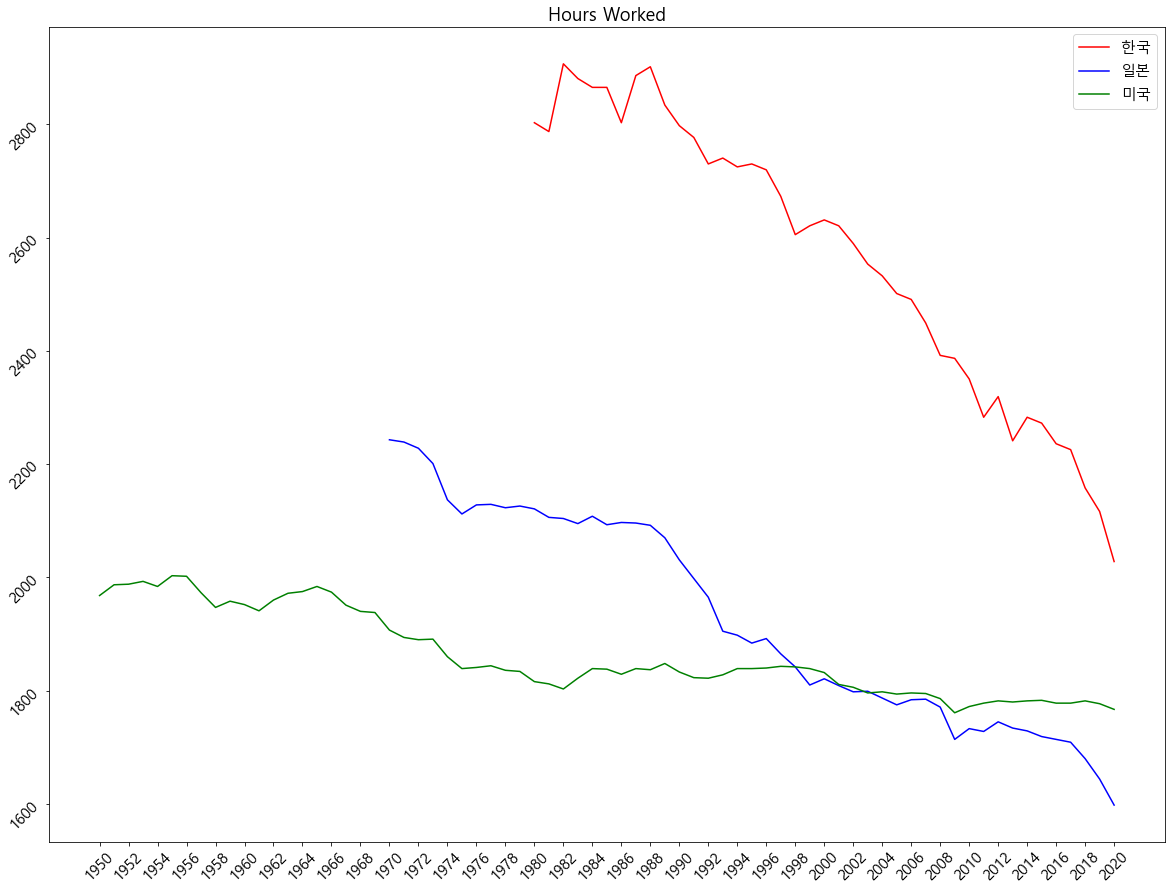

In [56]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))
plt.plot(hours_worked['Year'], hours_worked['Korea'], label='한국', color='red')
plt.plot(hours_worked['Year'], hours_worked['Japan'], label='일본', color='blue')
plt.plot(hours_worked['Year'],hours_worked['USA'], label='미국', color='green')
plt.title('Hours Worked')
plt.legend()
plt.xticks(np.arange(1950,2022,2),rotation=45)
plt.yticks(rotation=45)
plt.show()

In [79]:
japan_labor

,Year,Employment
1955,1955,40895.83
1956,1956,41705.00
1957,1957,42796.67
1958,1958,42973.33
1959,1959,43356.67
...,...,...
2016,2016,64701.67
2017,2017,65424.17
2018,2018,66820.00
2019,2019,67495.84


## Employment x Hours Worked => Total Work Hours

In [72]:
korea_labor = korea_employment
japan_labor = japan_employment
usa_labor = usa_employment


#print(korea_labor)
korea_labor.columns = ['Year', 'Employment']
print(korea_labor.head())
japan_labor.columns = ['Year', 'Employment']
print(japan_labor.head())
usa_labor.columns = ['Year', 'Employment']
print(usa_labor.head())

      Year  Employment
1983  1983    14504.67
1984  1984    14428.83
1985  1985    14970.17
1986  1986    15504.83
1987  1987    16354.00
      Year  Employment
1955  1955    40895.83
1956  1956    41705.00
1957  1957    42796.67
1958  1958    42973.33
1959  1959    43356.67
      Year  Employment
1955  1955    62170.33
1956  1956    63800.58
1957  1957    64067.92
1958  1958    63036.33
1959  1959    64629.83


In [75]:
for i in korea_labor.index:
    for j in korea_hours_worked.index:
        if (korea_labor.at[i, 'Year'] == korea_hours_worked.at[j, 'TIME']):
            korea_labor.at[i, 'Hours Worked'] = korea_hours_worked.at[j, 'Value']
            
korea_labor

,Year,Employment,Hours Worked
1983,1983,14504.67,2880.8
1984,1984,14428.83,2865.2
1985,1985,14970.17,2865.2
1986,1986,15504.83,2802.8
1987,1987,16354.00,2886.0
1988,1988,16869.33,2901.6
1989,1989,17560.58,2834.0
1990,1990,18084.75,2797.6
1991,1991,18648.75,2776.8
1992,1992,19009.33,2730.0


In [76]:
for i in korea_labor.index:
    if not (np.isnan(korea_labor.at[i, 'Employment']) | np.isnan(korea_labor.at[i, 'Hours Worked']) ):
        korea_labor.at[i, 'Total Work Hours'] = korea_labor.at[i, 'Employment'] * korea_labor.at[i, 'Hours Worked']
        
korea_labor

,Year,Employment,Hours Worked,Total Work Hours
1983,1983,14504.67,2880.8,4.178505e+07
1984,1984,14428.83,2865.2,4.134148e+07
1985,1985,14970.17,2865.2,4.289253e+07
1986,1986,15504.83,2802.8,4.345694e+07
1987,1987,16354.00,2886.0,4.719764e+07
1988,1988,16869.33,2901.6,4.894805e+07
1989,1989,17560.58,2834.0,4.976668e+07
1990,1990,18084.75,2797.6,5.059390e+07
1991,1991,18648.75,2776.8,5.178385e+07
1992,1992,19009.33,2730.0,5.189547e+07


In [77]:
korea_labor.index = list(range(28,66,1))
korea_labor

,Year,Employment,Hours Worked,Total Work Hours
28,1983,14504.67,2880.8,4.178505e+07
29,1984,14428.83,2865.2,4.134148e+07
30,1985,14970.17,2865.2,4.289253e+07
31,1986,15504.83,2802.8,4.345694e+07
32,1987,16354.00,2886.0,4.719764e+07
33,1988,16869.33,2901.6,4.894805e+07
34,1989,17560.58,2834.0,4.976668e+07
35,1990,18084.75,2797.6,5.059390e+07
36,1991,18648.75,2776.8,5.178385e+07
37,1992,19009.33,2730.0,5.189547e+07


In [80]:
for i in japan_labor.index:
    for j in japan_hours_worked.index:
        if (japan_labor.at[i, 'Year'] == japan_hours_worked.at[j, 'TIME']):
            japan_labor.at[i, 'Hours Worked'] = japan_hours_worked.at[j, 'Value']
            
japan_labor

,Year,Employment,Hours Worked
1955,1955,40895.83,NaN
1956,1956,41705.00,NaN
1957,1957,42796.67,NaN
1958,1958,42973.33,NaN
1959,1959,43356.67,NaN
...,...,...,...
2016,2016,64701.67,1714.0
2017,2017,65424.17,1709.0
2018,2018,66820.00,1680.0
2019,2019,67495.84,1644.0


In [81]:
for i in japan_labor.index:
    if not (np.isnan(japan_labor.at[i, 'Employment']) | np.isnan(japan_labor.at[i, 'Hours Worked']) ):
        japan_labor.at[i, 'Total Work Hours'] = japan_labor.at[i, 'Employment'] * japan_labor.at[i, 'Hours Worked']
        
japan_labor    


,Year,Employment,Hours Worked,Total Work Hours
1955,1955,40895.83,NaN,NaN
1956,1956,41705.00,NaN,NaN
1957,1957,42796.67,NaN,NaN
1958,1958,42973.33,NaN,NaN
1959,1959,43356.67,NaN,NaN
...,...,...,...,...
2016,2016,64701.67,1714.0,1.108987e+08
2017,2017,65424.17,1709.0,1.118099e+08
2018,2018,66820.00,1680.0,1.122576e+08
2019,2019,67495.84,1644.0,1.109632e+08


In [82]:
japan_labor.index = list(range(66))
japan_labor

,Year,Employment,Hours Worked,Total Work Hours
0,1955,40895.83,NaN,NaN
1,1956,41705.00,NaN,NaN
2,1957,42796.67,NaN,NaN
3,1958,42973.33,NaN,NaN
4,1959,43356.67,NaN,NaN
...,...,...,...,...
61,2016,64701.67,1714.0,1.108987e+08
62,2017,65424.17,1709.0,1.118099e+08
63,2018,66820.00,1680.0,1.122576e+08
64,2019,67495.84,1644.0,1.109632e+08


In [83]:
for i in usa_labor.index:
    for j in usa_hours_worked.index:
        if (usa_labor.at[i, 'Year'] == usa_hours_worked.at[j, 'TIME']):
            usa_labor.at[i, 'Hours Worked'] = usa_hours_worked.at[j, 'Value']
            
usa_labor

,Year,Employment,Hours Worked
1955,1955,62170.33,2003.0
1956,1956,63800.58,2002.0
1957,1957,64067.92,1973.0
1958,1958,63036.33,1947.0
1959,1959,64629.83,1958.0
...,...,...,...
2016,2016,151435.80,1778.0
2017,2017,153337.40,1778.0
2018,2018,155761.00,1782.0
2019,2019,157538.10,1777.0


In [84]:
for i in usa_labor.index:
    if not (np.isnan(usa_labor.at[i, 'Employment']) | np.isnan(usa_labor.at[i, 'Hours Worked']) ):
        usa_labor.at[i, 'Total Work Hours'] = usa_labor.at[i, 'Employment'] * usa_labor.at[i, 'Hours Worked']
        
usa_labor

,Year,Employment,Hours Worked,Total Work Hours
1955,1955,62170.33,2003.0,1.245272e+08
1956,1956,63800.58,2002.0,1.277288e+08
1957,1957,64067.92,1973.0,1.264060e+08
1958,1958,63036.33,1947.0,1.227317e+08
1959,1959,64629.83,1958.0,1.265452e+08
...,...,...,...,...
2016,2016,151435.80,1778.0,2.692529e+08
2017,2017,153337.40,1778.0,2.726339e+08
2018,2018,155761.00,1782.0,2.775661e+08
2019,2019,157538.10,1777.0,2.799452e+08


In [85]:
usa_labor.index = list(range(66))
usa_labor

,Year,Employment,Hours Worked,Total Work Hours
0,1955,62170.33,2003.0,1.245272e+08
1,1956,63800.58,2002.0,1.277288e+08
2,1957,64067.92,1973.0,1.264060e+08
3,1958,63036.33,1947.0,1.227317e+08
4,1959,64629.83,1958.0,1.265452e+08
...,...,...,...,...
61,2016,151435.80,1778.0,2.692529e+08
62,2017,153337.40,1778.0,2.726339e+08
63,2018,155761.00,1782.0,2.775661e+08
64,2019,157538.10,1777.0,2.799452e+08


In [86]:
total_work_hours = pd.concat([usa_labor['Year'], korea_labor['Total Work Hours'], 
                              japan_labor['Total Work Hours'],  usa_labor['Total Work Hours']], axis=1)

total_work_hours.columns=['Year', 'Korea', 'Japan', 'USA']
total_work_hours

,Year,Korea,Japan,USA
0,1955,NaN,NaN,1.245272e+08
1,1956,NaN,NaN,1.277288e+08
2,1957,NaN,NaN,1.264060e+08
3,1958,NaN,NaN,1.227317e+08
4,1959,NaN,NaN,1.265452e+08
...,...,...,...,...
61,2016,5.905077e+07,1.108987e+08,2.692529e+08
62,2017,5.947878e+07,1.118099e+08,2.726339e+08
63,2018,5.788203e+07,1.122576e+08,2.775661e+08
64,2019,5.740248e+07,1.109632e+08,2.799452e+08


In [87]:
total_work_hours

,Year,Korea,Japan,USA
0,1955,NaN,NaN,1.245272e+08
1,1956,NaN,NaN,1.277288e+08
2,1957,NaN,NaN,1.264060e+08
3,1958,NaN,NaN,1.227317e+08
4,1959,NaN,NaN,1.265452e+08
...,...,...,...,...
61,2016,5.905077e+07,1.108987e+08,2.692529e+08
62,2017,5.947878e+07,1.118099e+08,2.726339e+08
63,2018,5.788203e+07,1.122576e+08,2.775661e+08
64,2019,5.740248e+07,1.109632e+08,2.799452e+08


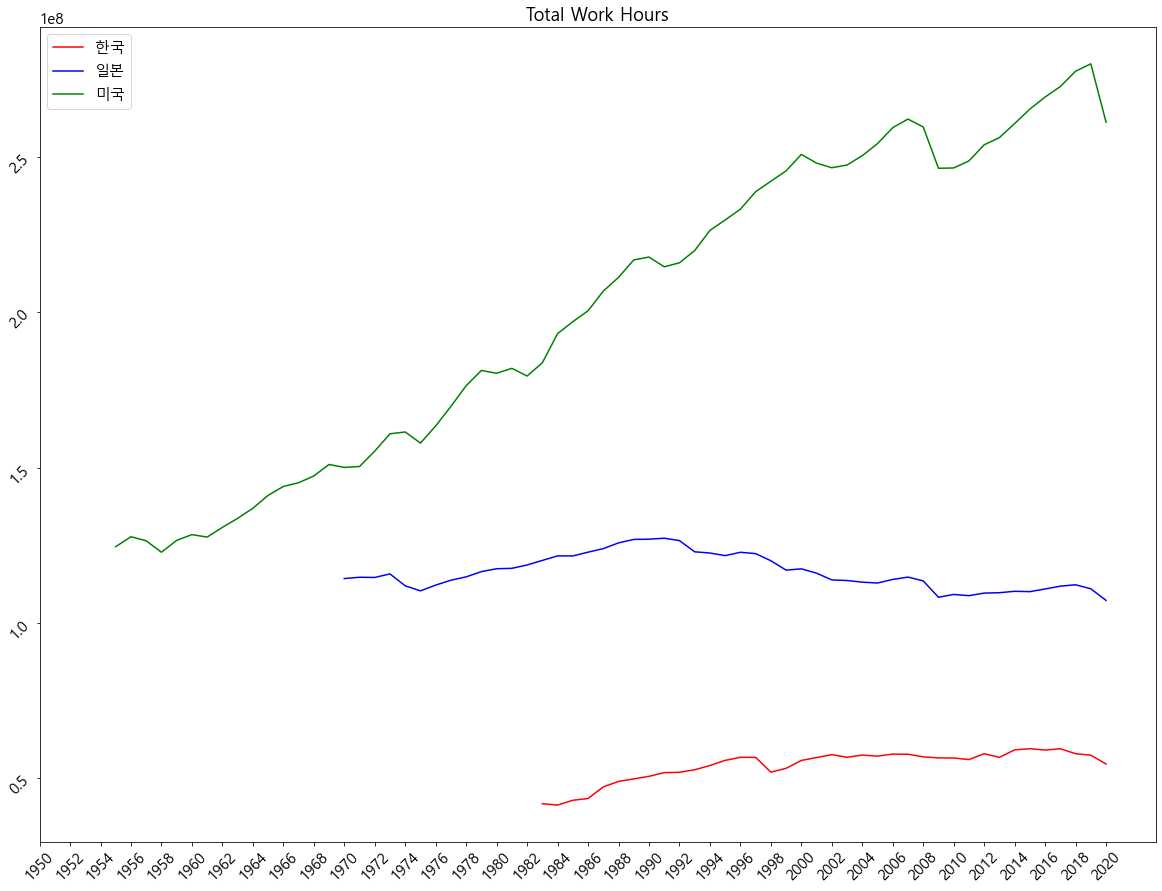

In [88]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))
plt.plot(total_work_hours['Year'], total_work_hours['Korea'], label='한국', color='red')
plt.plot(total_work_hours['Year'], total_work_hours['Japan'], label='일본', color='blue')
plt.plot(total_work_hours['Year'], total_work_hours['USA'], label='미국', color='green')
plt.title('Total Work Hours')
plt.legend()
plt.xticks(np.arange(1950, 2022, 2), rotation=45)
plt.yticks(rotation=45)
plt.show()

## Total Work Hours 로그 적용

In [89]:
total_work_hours_log = pd.concat([total_work_hours['Year'], np.log(total_work_hours['Korea']), np.log(total_work_hours['Japan']), np.log(total_work_hours['USA'])], axis=1)
#total_work_hours_log.rename(columns={'Country Name' : 'Year'}, inplace=True)
total_work_hours_log


,Year,Korea,Japan,USA
0,1955,NaN,NaN,18.640034
1,1956,NaN,NaN,18.665420
2,1957,NaN,NaN,18.655010
3,1958,NaN,NaN,18.625512
4,1959,NaN,NaN,18.656110
...,...,...,...,...
61,2016,17.893908,18.524127,19.411161
62,2017,17.901130,18.532311,19.423640
63,2018,17.873917,18.536307,19.441570
64,2019,17.865598,18.524709,19.450104


In [90]:
total_work_hours_log.to_csv("total_work_hours_log2.csv", index=False)

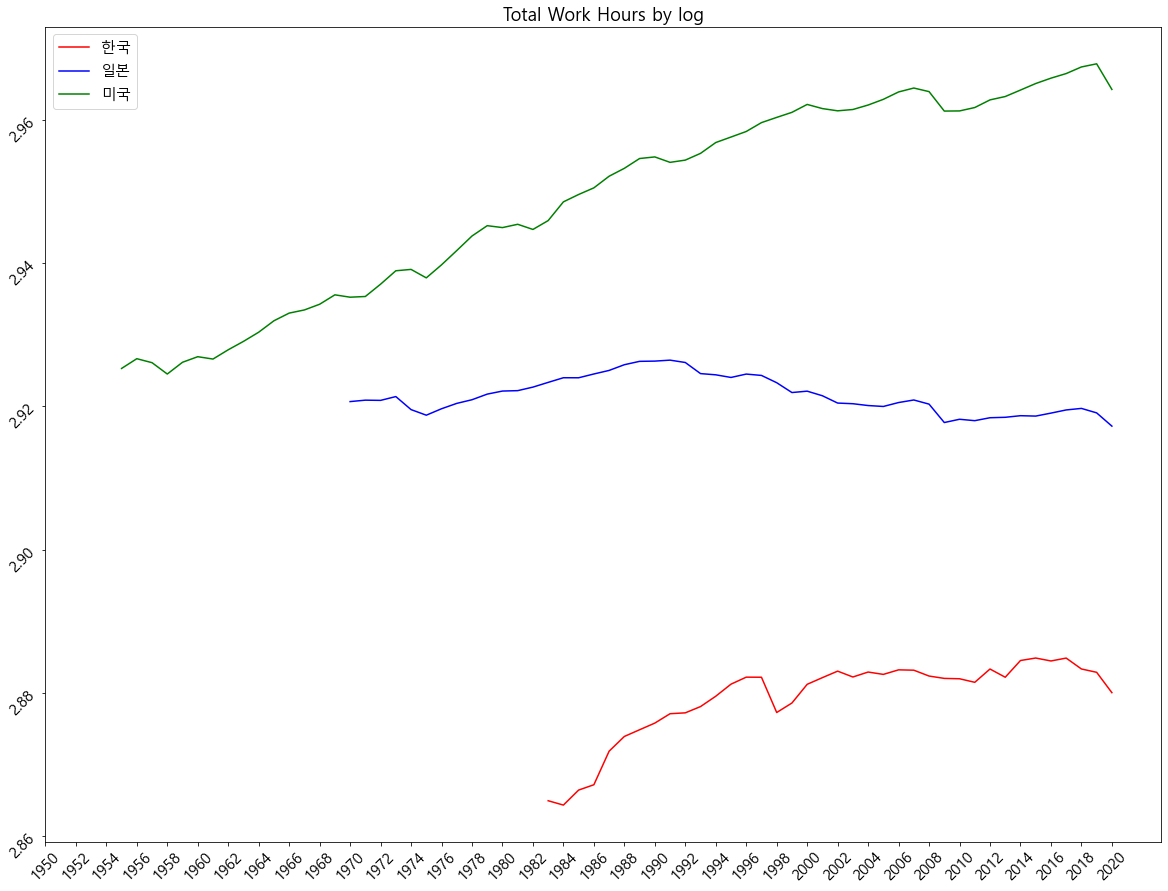

In [91]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))
plt.plot(total_work_hours_log['Year'], np.log(total_work_hours_log['Korea']), label='한국', color='red')
plt.plot(total_work_hours_log['Year'], np.log(total_work_hours_log['Japan']), label='일본', color='blue')
plt.plot(total_work_hours_log['Year'], np.log(total_work_hours_log['USA']), label='미국', color='green')
plt.title('Total Work Hours by log')
plt.legend()
plt.xticks(np.arange(1950, 2022, 2), rotation=45)
plt.yticks(rotation=45)
plt.show()

## 원본 데이터(한미일 각 capital stock)를 하나의 dataframe으로

In [73]:
korea_capital_stock = pd.read_csv("raw_data/korea capital stock.csv")

for i in korea_capital_stock.index:
    korea_capital_stock.at[i, 'DATE'] = int(korea_capital_stock.at[i, 'DATE'].split('-')[0])
    
korea_capital_stock

,DATE,RKNANPKRA666NRUG
0,1953,2.007394e+05
1,1954,1.986611e+05
2,1955,1.972402e+05
3,1956,1.955867e+05
4,1957,1.969652e+05
...,...,...
62,2015,9.813657e+06
63,2016,1.014895e+07
64,2017,1.054494e+07
65,2018,1.089496e+07


In [74]:
capital_stock = korea_capital_stock
capital_stock.rename(columns = {'DATE':'Year', 'RKNANPKRA666NRUG':'Korea'}, inplace=True)
capital_stock

,Year,Korea
0,1953,2.007394e+05
1,1954,1.986611e+05
2,1955,1.972402e+05
3,1956,1.955867e+05
4,1957,1.969652e+05
...,...,...
62,2015,9.813657e+06
63,2016,1.014895e+07
64,2017,1.054494e+07
65,2018,1.089496e+07


In [75]:
japan_capital_stock = pd.read_csv("raw_data/japan capital stock.csv")
for i in japan_capital_stock.index:
    japan_capital_stock.at[i, 'DATE'] = int(japan_capital_stock.at[i, 'DATE'].split('-')[0])
    
japan_capital_stock

,DATE,RKNANPJPA666NRUG
0,1950,9.723618e+05
1,1951,1.025208e+06
2,1952,1.064209e+06
3,1953,1.099585e+06
4,1954,1.143399e+06
...,...,...
65,2015,2.582159e+07
66,2016,2.588077e+07
67,2017,2.596641e+07
68,2018,2.604955e+07


In [76]:
for i in capital_stock.index:
    for j in japan_capital_stock.index:
        if (capital_stock.at[i, 'Year'] == japan_capital_stock.at[j, 'DATE']):
            capital_stock.at[i, 'Japan'] = japan_capital_stock.at[j, 'RKNANPJPA666NRUG']
            
capital_stock

,Year,Korea,Japan
0,1953,2.007394e+05,1.099585e+06
1,1954,1.986611e+05,1.143399e+06
2,1955,1.972402e+05,1.199048e+06
3,1956,1.955867e+05,1.267903e+06
4,1957,1.969652e+05,1.357632e+06
...,...,...,...
62,2015,9.813657e+06,2.582159e+07
63,2016,1.014895e+07,2.588077e+07
64,2017,1.054494e+07,2.596641e+07
65,2018,1.089496e+07,2.604955e+07


In [77]:
usa_capital_stock = pd.read_csv("raw_data/usa capital stock.csv")
for i in usa_capital_stock.index:
    usa_capital_stock.at[i, 'DATE'] = int(usa_capital_stock.at[i, 'DATE'].split('-')[0])
    
usa_capital_stock

,DATE,RKNANPUSA666NRUG
0,1950,10576814
1,1951,10912329
2,1952,11273329
3,1953,11682797
4,1954,12073595
...,...,...
65,2015,65057816
66,2016,65974060
67,2017,66942704
68,2018,68007352


In [78]:
for i in capital_stock.index:
    for j in usa_capital_stock.index:
        if (capital_stock.at[i, 'Year'] == usa_capital_stock.at[j, 'DATE']):
            capital_stock.at[i, 'USA'] = usa_capital_stock.at[j, 'RKNANPUSA666NRUG']
            
capital_stock

,Year,Korea,Japan,USA
0,1953,2.007394e+05,1.099585e+06,11682797.0
1,1954,1.986611e+05,1.143399e+06,12073595.0
2,1955,1.972402e+05,1.199048e+06,12512252.0
3,1956,1.955867e+05,1.267903e+06,12946795.0
4,1957,1.969652e+05,1.357632e+06,13370985.0
...,...,...,...,...
62,2015,9.813657e+06,2.582159e+07,65057816.0
63,2016,1.014895e+07,2.588077e+07,65974060.0
64,2017,1.054494e+07,2.596641e+07,66942704.0
65,2018,1.089496e+07,2.604955e+07,68007352.0


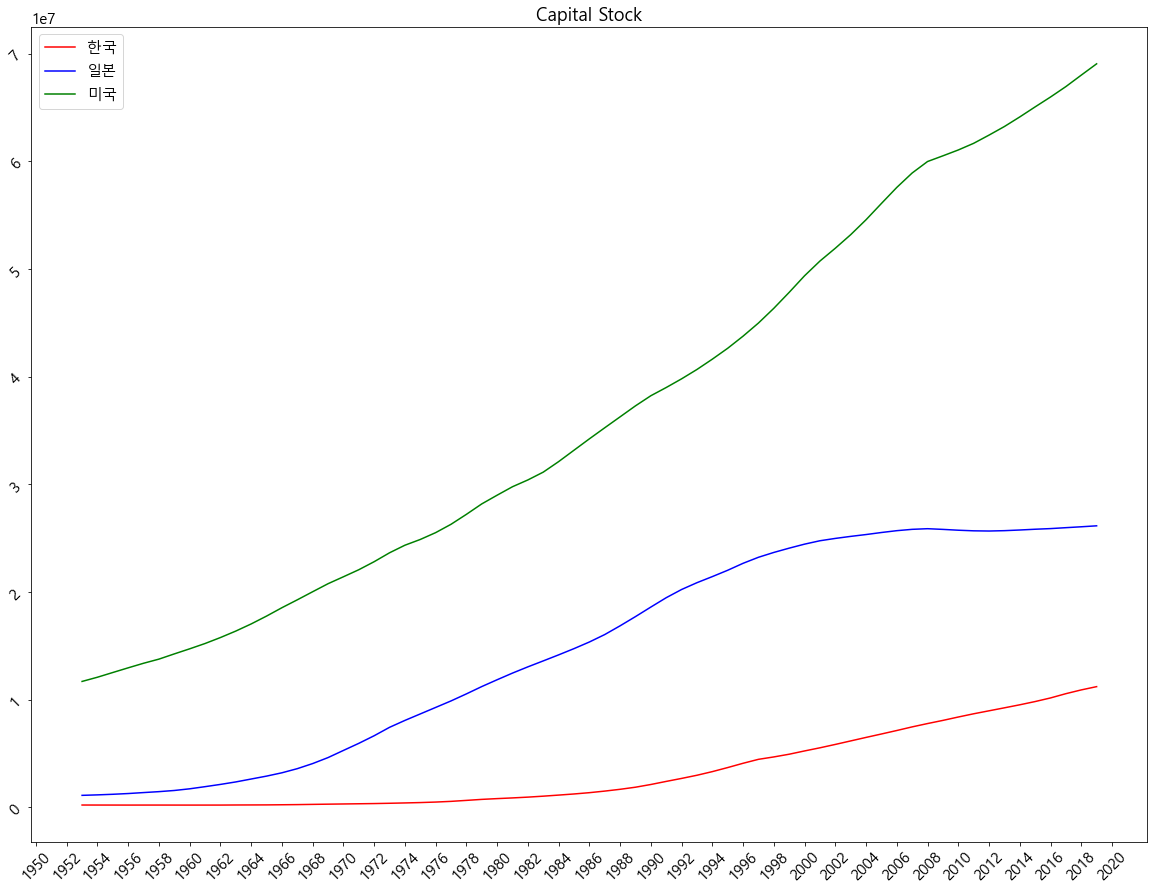

In [99]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))
plt.plot(capital_stock['Year'], capital_stock['Korea'], label='한국', color='red')
plt.plot(capital_stock['Year'], capital_stock['Japan'], label='일본', color='blue')
plt.plot(capital_stock['Year'], capital_stock['USA'], label='미국', color='green')
plt.title('Capital Stock')
plt.legend()
plt.xticks(np.arange(1950, 2022, 2), rotation=45)
plt.yticks(rotation=45)
plt.show()

In [80]:
capital_stock.to_csv('capital_stock.csv', index=False)

## Capital Stock log 적용

In [81]:
capital_stock_log = pd.concat( [capital_stock['Year'], np.log(capital_stock['Korea']), 
                                np.log(capital_stock['Japan']), np.log(capital_stock['USA'])], axis=1)

capital_stock_log

,Year,Korea,Japan,USA
0,1953,12.209763,13.910443,16.273628
1,1954,12.199356,13.949516,16.306531
2,1955,12.192178,13.997038,16.342219
3,1956,12.183759,14.052875,16.376359
4,1957,12.190783,14.121253,16.408598
...,...,...,...,...
62,2015,16.099286,17.066721,17.990787
63,2016,16.132881,17.069011,18.004772
64,2017,16.171157,17.072314,18.019348
65,2018,16.203811,17.075511,18.035126


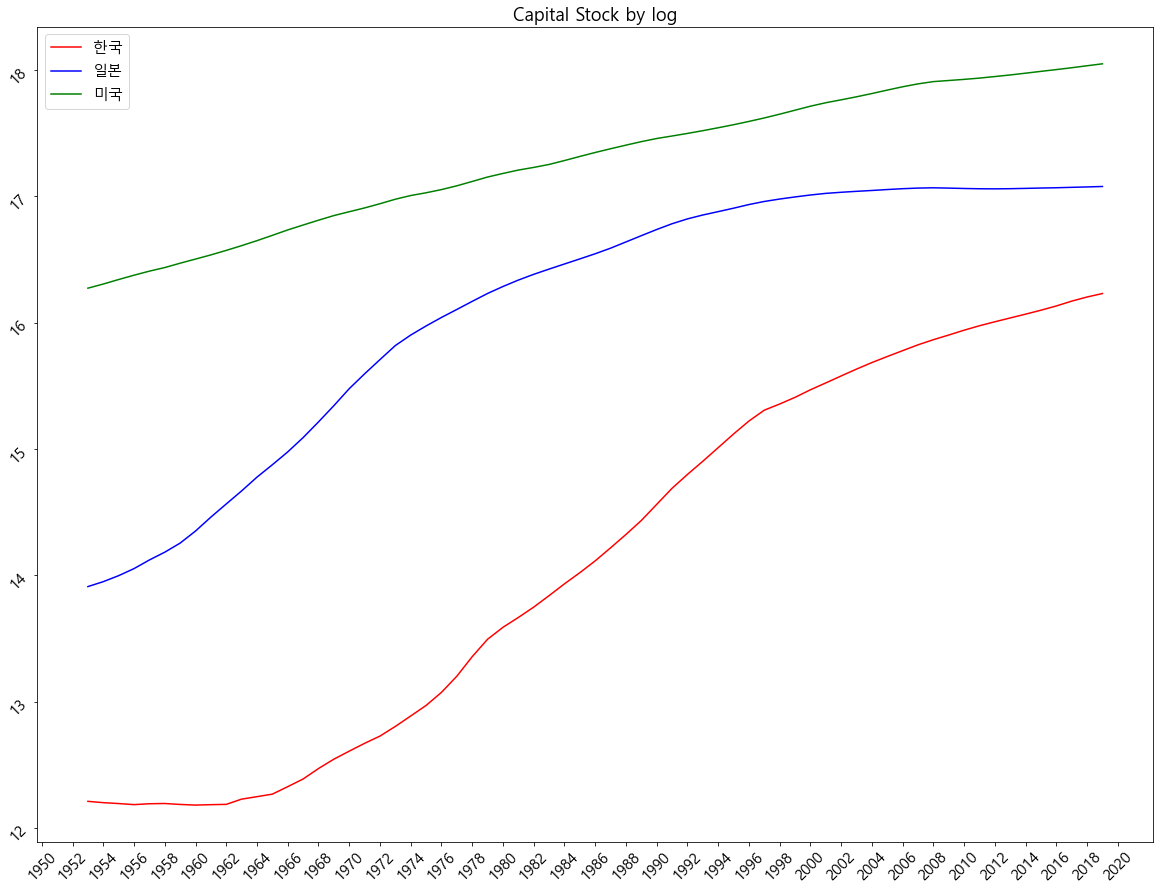

In [82]:
plt.rc("font", family='Malgun Gothic')
plt.rc('font', size=15) 
plt.figure(figsize=(20,15))
plt.plot(capital_stock_log['Year'], capital_stock_log['Korea'], label='한국', color='red')
plt.plot(capital_stock_log['Year'], capital_stock_log['Japan'], label='일본', color='blue')
plt.plot(capital_stock_log['Year'], capital_stock_log['USA'], label='미국', color='green')
plt.title('Capital Stock by log')
plt.legend()
plt.xticks(np.arange(1950, 2022, 2), rotation=45)
plt.yticks(rotation=45)
plt.show()

In [83]:
capital_stock_log.to_csv('capital_stock_log.csv', index=False)

In [84]:
capital_stock_log

,Year,Korea,Japan,USA
0,1953,12.209763,13.910443,16.273628
1,1954,12.199356,13.949516,16.306531
2,1955,12.192178,13.997038,16.342219
3,1956,12.183759,14.052875,16.376359
4,1957,12.190783,14.121253,16.408598
...,...,...,...,...
62,2015,16.099286,17.066721,17.990787
63,2016,16.132881,17.069011,18.004772
64,2017,16.171157,17.072314,18.019348
65,2018,16.203811,17.075511,18.035126
